In [1]:
import os
import numpy as np
from sklearn import svm
from skimage import io, color
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tpot import TPOTClassifier

In [4]:
mednist_path = './MedNIST/'
classes = ['AbdomenCT', 'BreastMRI', 'CXR', 'ChestCT', 'Hand', 'HeadCT']
data = []
target = []
for idx, class_name in enumerate(classes):
    folder_path = os.path.join(mednist_path, class_name)
    file_names = os.listdir(folder_path)
    for file_name in file_names:
        image_path = os.path.join(folder_path, file_name)
        image = io.imread(image_path)
        # Converter a imagem em um vetor de recursos unidimensional
        image_flattened = image.flatten()
        data.append(image_flattened)
        target.append(idx)

data = np.array(data)
target = np.array(target)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)


In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)  # Escolha o número de componentes desejado
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [8]:
tpot = TPOTClassifier(generations=4, population_size=30, verbosity=2, random_state=42,subsample=0.5,max_eval_time_mins=3)
tpot.fit(X_train_pca, y_train)

                                                                                
Generation 1 - Current best internal CV score: 0.9960137596260472
                                                                               
Generation 2 - Current best internal CV score: 0.9963530481755936
                                                                              
Generation 3 - Current best internal CV score: 0.9963530481755936
                                                                                
Generation 4 - Current best internal CV score: 0.9963530481755936
                                                             
Best pipeline: KNeighborsClassifier(input_matrix, n_neighbors=3, p=2, weights=distance)


TPOTClassifier(generations=4, max_eval_time_mins=3, population_size=30,
               random_state=42, subsample=0.5, verbosity=2)

In [9]:
y_pred = tpot.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 99.69%


In [10]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train_pca, y_train)

y_pred = clf.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 99.20%


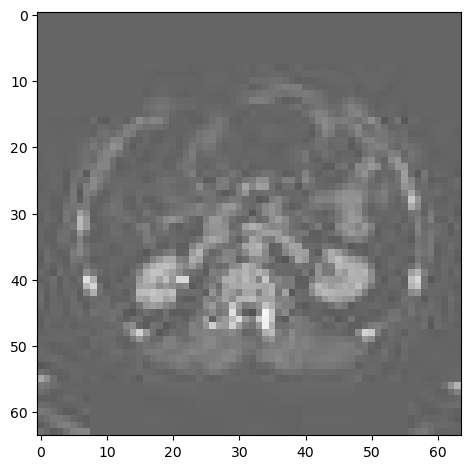

Classe Real: AbdomenCT
Classe Prevista: AbdomenCT
--------------------


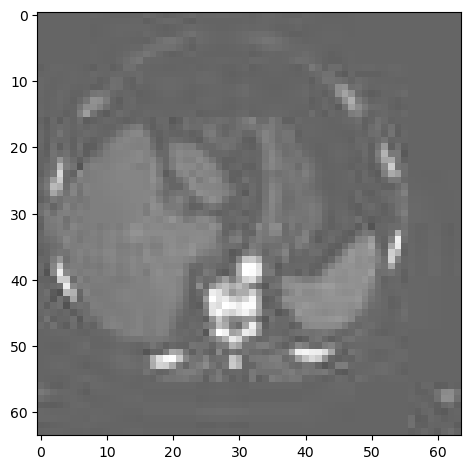

Classe Real: AbdomenCT
Classe Prevista: AbdomenCT
--------------------


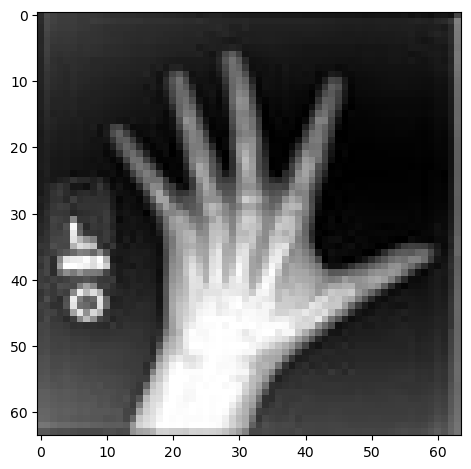

Classe Real: Hand
Classe Prevista: Hand
--------------------


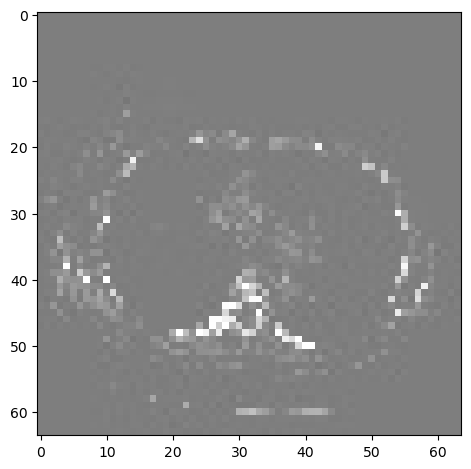

Classe Real: ChestCT
Classe Prevista: ChestCT
--------------------


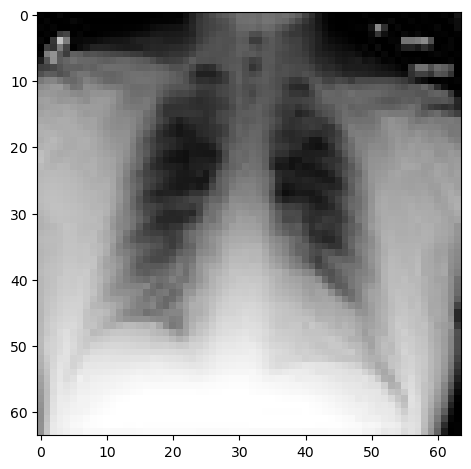

Classe Real: CXR
Classe Prevista: CXR
--------------------


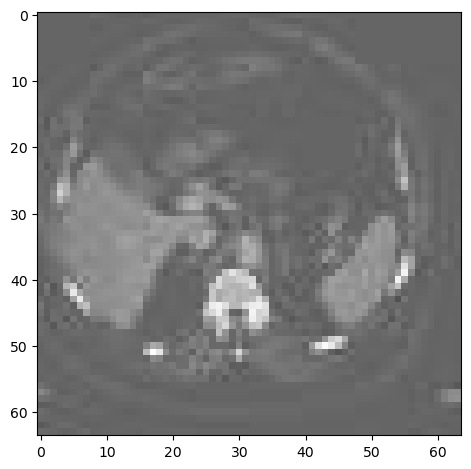

Classe Real: AbdomenCT
Classe Prevista: AbdomenCT
--------------------


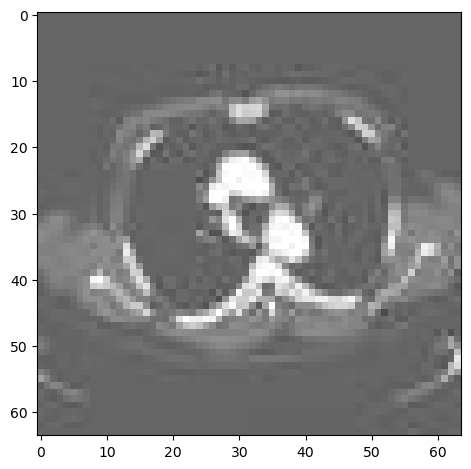

Classe Real: AbdomenCT
Classe Prevista: AbdomenCT
--------------------


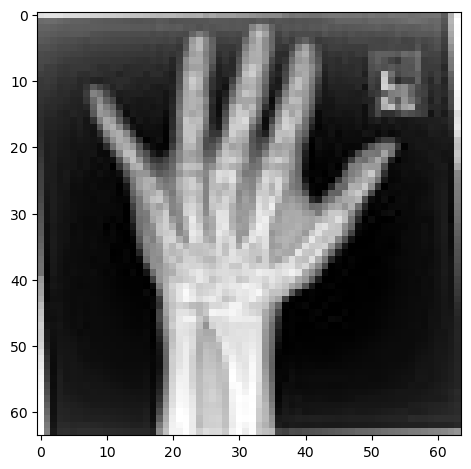

Classe Real: Hand
Classe Prevista: Hand
--------------------


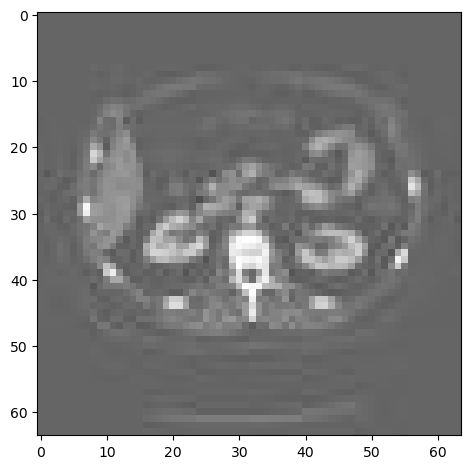

Classe Real: AbdomenCT
Classe Prevista: AbdomenCT
--------------------


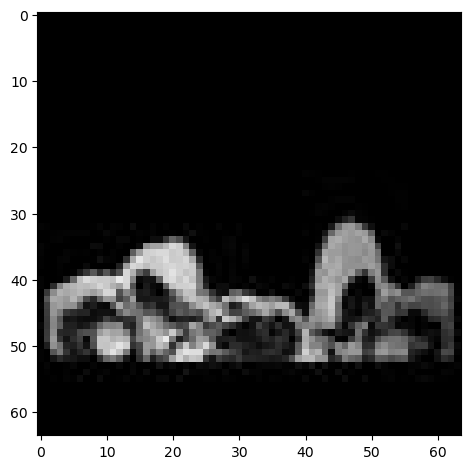

Classe Real: BreastMRI
Classe Prevista: BreastMRI
--------------------


In [11]:
for i in range(5):
    image = X_test[i].reshape((64, 64))  # Redimensionar o vetor de recursos para uma imagem
    class_name = classes[y_test[i]]  # Obter o nome da classe real
    predicted_class = classes[y_pred[i]]  # Obter o nome da classe prevista
    io.imshow(image)
    io.show()
    print("Classe Real: {}".format(class_name))
    print("Classe Prevista: {}".format(predicted_class))
    print("--------------------")

In [3]:
import os
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# Definir as dimensões desejadas para redimensionar as imagens
image_width = 256
image_height = 256

# Definir os diretórios das pastas contendo as imagens e uma lista vazia para armazenar as imagens e seus rótulos
data_dir = 'archive/images'
image_folders = sorted(os.listdir(data_dir))
images = []
labels = []

# Função para ler e redimensionar as imagens
def read_and_resize_image(file_path):
    image = cv2.imread(file_path)
    image = cv2.resize(image, (image_width, image_height))
    return image.flatten()  # Retorna o array de pixels aplastado

# Percorrer as pastas e ler as imagens
for folder in image_folders:
    folder_path = os.path.join(data_dir, folder)
    if os.path.isdir(folder_path):
        image_files = sorted(os.listdir(folder_path))
        for image_file in image_files:
            image_path = os.path.join(folder_path, image_file)
            image = read_and_resize_image(image_path)
            images.append(image)
            labels.append(folder)  # Use o nome da pasta como rótulo

# Converter as listas de imagens e rótulos em matrizes numpy
images = np.array(images)
labels = np.array(labels)

images, labels = shuffle(images, labels, random_state=42)


In [4]:
from sklearn.model_selection import train_test_split

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


In [5]:
len(X_train) + len(X_test)

10500

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)  # Escolha o número de componentes desejado
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [8]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train_pca, y_train)

y_pred = clf.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 13.19%


In [10]:
tpot = TPOTClassifier(generations=5, population_size=40, verbosity=2, random_state=42,subsample=1,max_eval_time_mins=10)
tpot.fit(X_train_pca, y_train)

                                                                               
Generation 1 - Current best internal CV score: 0.1951190476190476
                                                                                
Generation 2 - Current best internal CV score: 0.1955952380952381
                                                                                 
Generation 3 - Current best internal CV score: 0.20309523809523808
                                                                                
Generation 4 - Current best internal CV score: 0.20309523809523808
                                                                                
Generation 5 - Current best internal CV score: 0.20309523809523808
                                                                                
Best pipeline: MLPClassifier(PCA(MaxAbsScaler(input_matrix), iterated_power=3, svd_solver=randomized), alpha=0.001, learning_rate_init=0.01)


TPOTClassifier(generations=5, max_eval_time_mins=10, population_size=40,
               random_state=42, subsample=1, verbosity=2)

In [11]:
y_pred = tpot.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 21.71%
